In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataset.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

No Nans found! Great

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []  # wcss stands for "within-cluster sum of squares"

# Loop through a range of cluster numbers (from 1 to 10 in this case)
for i in range(1, 11):
    # Create a KMeans instance with 'i' clusters, 'k-means++' initialization, and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    
    # Fit the KMeans model to the data (X)
    kmeans.fit(X)
    
    # Inertia method returns the within-cluster sum of squares (WCSS) for that model
    wcss.append(kmeans.inertia_)


C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

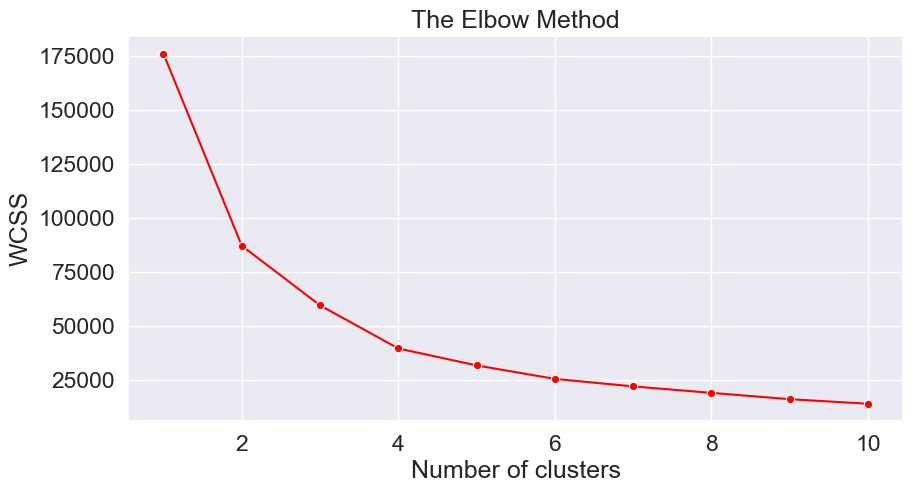

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))  # Set the figure size

# Plotting the line graph with cluster numbers on the x-axis and WCSS on the y-axis
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')

# Adding title and labels to the plot
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Display the plot
plt.show()


In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<a id="7"></a>
## 7. Visualisation

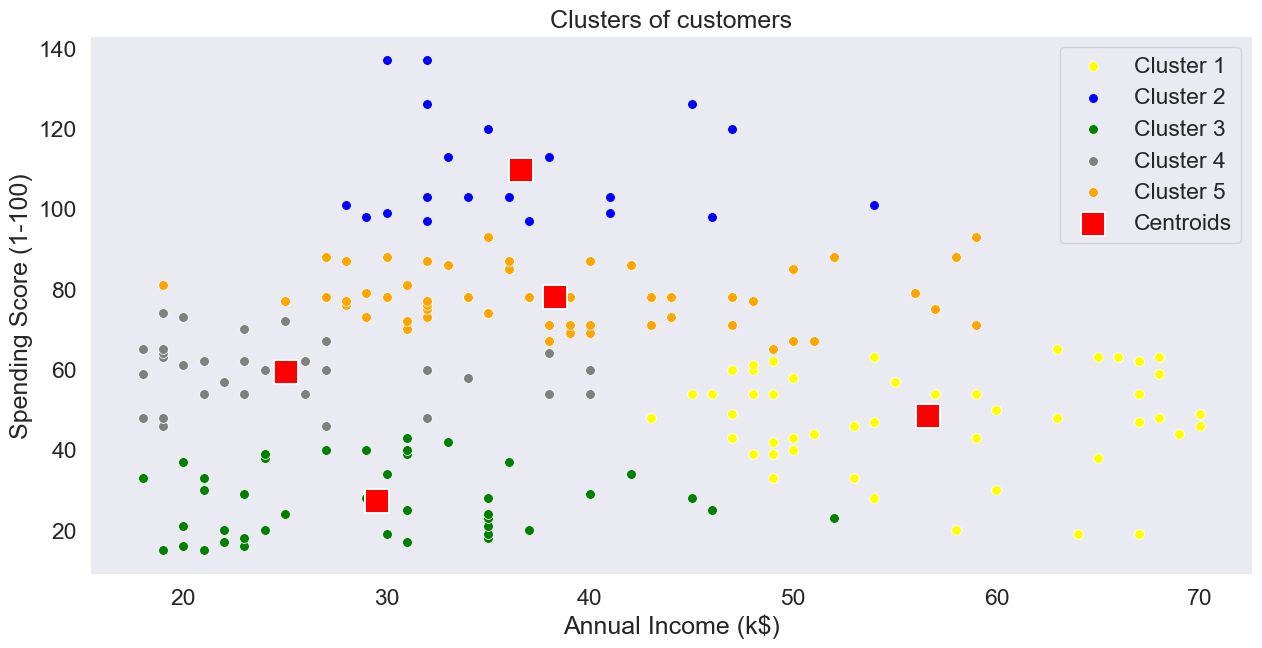

In [20]:
# Visualising the clusters
plt.figure(figsize=(15, 7)) #  Sets the size of the figure.

# Scatter plots for each cluster
sns.scatterplot(x= X[y_kmeans == 0, 0], y= X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x= X[y_kmeans == 1, 0], y= X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x= X[y_kmeans == 2, 0], y= X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x= X[y_kmeans == 3, 0], y= X[y_kmeans == 3, 1], color='grey', label='Cluster 4', s=50)
sns.scatterplot(x= X[y_kmeans == 4, 0], y= X[y_kmeans == 4, 1], color='orange', label='Cluster 5', s=50)

# Scatter plot for centroids
sns.scatterplot(x= kmeans.cluster_centers_[:, 0], y= kmeans.cluster_centers_[:, 1], color='red', 
                label='Centroids', s=300, marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
